In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-8esnjx5z
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-8esnjx5z
     |████████████████████████████████| 634kB 8.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=f6dce2cf1aa26ee7aa248e93a08986f4dcc9efc4a77bb8e888a0f9efec4e0142
  Stored in directory: /tmp/pip-ephem-wheel-cache-nn9qdazn/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=27fe26d454ae02150e5bf1b09044c1ffb4c06bcfbd919e30b2e935f21d28bff5
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [0]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" git+https://github.com/NVIDIA/apex

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-e7rmfa87
Created temporary directory: /tmp/pip-req-tracker-ao4xil8q
Created requirements tracker '/tmp/pip-req-tracker-ao4xil8q'
Created temporary directory: /tmp/pip-install-m6s5qq1c
  Created temporary directory: /tmp/pip-req-build-wdgfl3tt
  Cloning https://github.com/NVIDIA/apex to /tmp/pip-req-build-wdgfl3tt
  Running command git clone -q https://github.com/NVIDIA/apex /tmp/pip-req-build-wdgfl3tt
  Running command git submodule update --init --recursive -q
  Added git+https://github.com/NVIDIA/apex to build tracker '/tmp/pip-req-tracker-ao4xil8q'
    Running setup.py (path:/tmp/pip-req-build-wdgfl3tt/setup.py) egg_info for package from git+https://github.com/NVIDIA/apex
    Running comman

In [0]:
cd /content/drive/My Drive/Backup/EVP/S12

/content/drive/My Drive/Backup/EVP/S12


In [0]:
# !unzip "tiny-imagenet-200.zip"

In [0]:
!unzip "tiny-imagenet-200.zip" -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating

In [0]:
!pwd

/content/drive/My Drive/Backup/EVP/S12


In [0]:
from __future__ import print_function
import torch
import time
import scipy.ndimage as nd
import scipy.misc as misc
import os
import numpy as np
from sklearn.utils import shuffle
# from torch.optim.lr_scheduler import OneCycleLR
# import numpy as np
# import matplotlib.pyplot as plt

# Setting Seed for Reproducibility

In [0]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Data Loader


In [0]:
from PIL import Image
import cv2
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
# from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor

In [0]:
imagenet_path=  r"/content/tiny-imagenet-200"

In [0]:
dataset, class_names = compile_data(imagenet_path)

In [0]:
dataset[2000]

('/content/tiny-imagenet-200/train/n07749582/images/n07749582_0.JPEG', 4)

In [0]:
import torchvision
from torchvision import datasets, transforms
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Normalize, Cutout, Rotate, RandomResizedCrop

)
from vision.train.data_loader import CustomDatasetLoader, compile_data
# from albumentations.pytorch import ToTensor


In [0]:
mean= (0.48043839, 0.44820218, 0.39760034)
std= (0.27698959, 0.26908774, 0.28216029)

In [0]:
albumentations_transform_train = [
    # Resize(32,32,always_apply=True),
    Rotate((-10,10)),
    HorizontalFlip(),
    RandomResizedCrop(64,64),
    Cutout(10,10),
    
]

In [0]:
trainset_config_list = {
    'dataset' : dataset,
    'mean' : mean,
    'std' : std,
    'trainset_transforms' : albumentations_transform_train,
    'batch_size' : 64,
    'num_workers': 4,
    'use_cuda' : torch.cuda.is_available()
}

In [0]:
trainloader_obj = CustomDatasetLoader(trainset_config_list)
train_loader, test_loader = trainloader_obj()

## Visualise Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


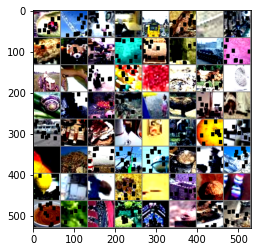

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Model Summary


In [0]:
from vision.models.resnet import ResNet18
import torch.nn as nn
import torch.optim as optim

try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18(len(class_names)).to(device)
summary(model, input_size=(3,64,64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

#LR Finder

In [0]:
from vision.train.utils.lr_finder import LRFinder

In [0]:
learning_rate = 1e-5
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18(len(class_names)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


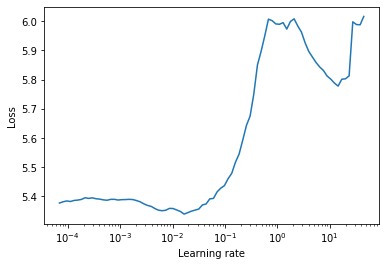

In [0]:
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [0]:
[_ for _ in zip(lr_finder.history['loss'], lr_finder.history['lr'])]
(min(lr_finder.history['loss']))

5.339183405807203

In [0]:
min_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(min(lr_finder.history['loss']))]
min_lr


0.016595869074375613

# Train and Evaluate Model

In [0]:
from vision.train.train_evaluate import Train
from torch.optim.lr_scheduler import ReduceLROnPlateau


CUDA Available? True


## Initialising and setting hyper-parameters


In [0]:
EPOCHS = 50
learning_rate = min_lr
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18(len(class_names)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# scheduler =None
scheduler = ReduceLROnPlateau(optimizer, min_lr=1e-4, patience = 4, verbose=True)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)


## Creating Config for Training 

In [0]:
config_list ={
    "device": device,
    "model": model,
    "EPOCHS": EPOCHS,
    "criterion": criterion,
    "optimizer": optimizer,
    "scheduler": scheduler,
    "logger": None,
    "train_loader": train_loader,
    "test_loader" : test_loader,
    "flag_misclassified_images": True
}

## Create obj of Train and run for training


In [0]:
cifar_model_train = Train(config_list)
cifar_model_train.run_model()

  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH:1 | LR: 0.016595869074375613


Loss=4.558066368103027 Batch_id=1203 Accuracy=3.93: 100%|██████████| 1204/1204 [02:41<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0719, Accuracy: 2147/33000 (6.51%)

EPOCH:2 | LR: 0.016595869074375613


Loss=4.141720771789551 Batch_id=1203 Accuracy=8.17: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0652, Accuracy: 3779/33000 (11.45%)

EPOCH:3 | LR: 0.016595869074375613


Loss=4.429377555847168 Batch_id=1203 Accuracy=12.06: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]



Test set: Average loss: 0.0602, Accuracy: 5096/33000 (15.44%)



  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH:4 | LR: 0.016595869074375613


Loss=4.453311920166016 Batch_id=1203 Accuracy=15.48: 100%|██████████| 1204/1204 [02:40<00:00,  7.49it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0570, Accuracy: 6432/33000 (19.49%)

EPOCH:5 | LR: 0.016595869074375613


Loss=4.151473522186279 Batch_id=1203 Accuracy=18.85: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0529, Accuracy: 7803/33000 (23.65%)

EPOCH:6 | LR: 0.016595869074375613


Loss=3.745093822479248 Batch_id=1203 Accuracy=21.61: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]



Test set: Average loss: 0.0511, Accuracy: 8566/33000 (25.96%)



  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH:7 | LR: 0.016595869074375613


Loss=4.530789852142334 Batch_id=1203 Accuracy=24.11: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9454/33000 (28.65%)

EPOCH:8 | LR: 0.016595869074375613


Loss=3.5953445434570312 Batch_id=1203 Accuracy=26.24: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 10755/33000 (32.59%)

EPOCH:9 | LR: 0.016595869074375613


Loss=3.884830951690674 Batch_id=1203 Accuracy=28.23: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0462, Accuracy: 10664/33000 (32.32%)

EPOCH:10 | LR: 0.016595869074375613


Loss=1.8370369672775269 Batch_id=1203 Accuracy=30.00: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0425, Accuracy: 11825/33000 (35.83%)

EPOCH:11 | LR: 0.016595869074375613


Loss=2.6848647594451904 Batch_id=1203 Accuracy=31.58: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0425, Accuracy: 11921/33000 (36.12%)

EPOCH:12 | LR: 0.016595869074375613


Loss=3.21724009513855 Batch_id=1203 Accuracy=32.89: 100%|██████████| 1204/1204 [02:42<00:00,  7.43it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0413, Accuracy: 12652/33000 (38.34%)

EPOCH:13 | LR: 0.016595869074375613


Loss=2.4817733764648438 Batch_id=1203 Accuracy=34.19: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0397, Accuracy: 13186/33000 (39.96%)

EPOCH:14 | LR: 0.016595869074375613


Loss=3.8434770107269287 Batch_id=1203 Accuracy=35.78: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 13513/33000 (40.95%)

EPOCH:15 | LR: 0.016595869074375613


Loss=2.9135899543762207 Batch_id=1203 Accuracy=37.07: 100%|██████████| 1204/1204 [02:40<00:00,  7.49it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0401, Accuracy: 13100/33000 (39.70%)

EPOCH:16 | LR: 0.016595869074375613


Loss=4.097194671630859 Batch_id=1203 Accuracy=38.29: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0381, Accuracy: 14075/33000 (42.65%)

EPOCH:17 | LR: 0.016595869074375613


Loss=2.2127177715301514 Batch_id=1203 Accuracy=39.28: 100%|██████████| 1204/1204 [02:40<00:00,  7.49it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0365, Accuracy: 14639/33000 (44.36%)

EPOCH:18 | LR: 0.016595869074375613


Loss=2.9233498573303223 Batch_id=1203 Accuracy=40.20: 100%|██████████| 1204/1204 [02:40<00:00,  7.49it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0375, Accuracy: 14365/33000 (43.53%)

EPOCH:19 | LR: 0.016595869074375613


Loss=2.482325792312622 Batch_id=1203 Accuracy=41.29: 100%|██████████| 1204/1204 [02:41<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 15380/33000 (46.61%)

EPOCH:20 | LR: 0.016595869074375613


Loss=3.788699150085449 Batch_id=1203 Accuracy=42.39: 100%|██████████| 1204/1204 [02:40<00:00,  7.49it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Accuracy: 14830/33000 (44.94%)

EPOCH:21 | LR: 0.016595869074375613


Loss=2.737767219543457 Batch_id=1203 Accuracy=43.34: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0359, Accuracy: 15276/33000 (46.29%)

EPOCH:22 | LR: 0.016595869074375613


Loss=3.1347084045410156 Batch_id=1203 Accuracy=44.06: 100%|██████████| 1204/1204 [02:40<00:00,  7.49it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0356, Accuracy: 15635/33000 (47.38%)

EPOCH:23 | LR: 0.016595869074375613


Loss=3.1659276485443115 Batch_id=1203 Accuracy=44.99: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 15691/33000 (47.55%)

EPOCH:24 | LR: 0.016595869074375613


Loss=1.4878597259521484 Batch_id=1203 Accuracy=45.83: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0348, Accuracy: 15878/33000 (48.12%)

EPOCH:25 | LR: 0.016595869074375613


Loss=3.249863624572754 Batch_id=1203 Accuracy=46.66: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0353, Accuracy: 15604/33000 (47.28%)

EPOCH:26 | LR: 0.016595869074375613


Loss=1.9988932609558105 Batch_id=1203 Accuracy=47.46: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0356, Accuracy: 15408/33000 (46.69%)

EPOCH:27 | LR: 0.016595869074375613


Loss=3.0529651641845703 Batch_id=1203 Accuracy=48.25: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 16200/33000 (49.09%)

EPOCH:28 | LR: 0.016595869074375613


Loss=2.297846794128418 Batch_id=1203 Accuracy=49.26: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0343, Accuracy: 16297/33000 (49.38%)

EPOCH:29 | LR: 0.016595869074375613


Loss=2.358881711959839 Batch_id=1203 Accuracy=49.55: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 16557/33000 (50.17%)

EPOCH:30 | LR: 0.016595869074375613


Loss=1.9354753494262695 Batch_id=1203 Accuracy=50.60: 100%|██████████| 1204/1204 [02:41<00:00,  7.44it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 16510/33000 (50.03%)

EPOCH:31 | LR: 0.016595869074375613


Loss=3.7657291889190674 Batch_id=1203 Accuracy=51.20: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0365, Accuracy: 16310/33000 (49.42%)

EPOCH:32 | LR: 0.016595869074375613


Loss=3.1530404090881348 Batch_id=1203 Accuracy=52.03: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0357, Accuracy: 16482/33000 (49.95%)

EPOCH:33 | LR: 0.016595869074375613


Loss=2.637491464614868 Batch_id=1203 Accuracy=52.50: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 16814/33000 (50.95%)

EPOCH:34 | LR: 0.016595869074375613


Loss=5.050820827484131 Batch_id=1203 Accuracy=53.10: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]

Epoch    34: reducing learning rate of group 0 to 1.6596e-03.

Test set: Average loss: 0.0380, Accuracy: 16898/33000 (51.21%)

EPOCH:35 | LR: 0.0016595869074375613


Loss=2.232412338256836 Batch_id=1203 Accuracy=59.11: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 18208/33000 (55.18%)

EPOCH:36 | LR: 0.0016595869074375613


Loss=1.5808976888656616 Batch_id=1203 Accuracy=60.74: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 18224/33000 (55.22%)

EPOCH:37 | LR: 0.0016595869074375613


Loss=1.7576382160186768 Batch_id=1203 Accuracy=61.50: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 18279/33000 (55.39%)

EPOCH:38 | LR: 0.0016595869074375613


Loss=1.766441822052002 Batch_id=1203 Accuracy=62.36: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0367, Accuracy: 18235/33000 (55.26%)

EPOCH:39 | LR: 0.0016595869074375613


Loss=2.001819610595703 Batch_id=1203 Accuracy=62.42: 100%|██████████| 1204/1204 [02:41<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 18254/33000 (55.32%)

EPOCH:40 | LR: 0.0016595869074375613


Loss=1.3510301113128662 Batch_id=1203 Accuracy=62.96: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 18237/33000 (55.26%)

EPOCH:41 | LR: 0.0016595869074375613


Loss=2.3600540161132812 Batch_id=1203 Accuracy=62.91: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0336, Accuracy: 18300/33000 (55.45%)

EPOCH:42 | LR: 0.0016595869074375613


Loss=2.418131113052368 Batch_id=1203 Accuracy=63.29: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 18394/33000 (55.74%)

EPOCH:43 | LR: 0.0016595869074375613


Loss=3.495781660079956 Batch_id=1203 Accuracy=63.48: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 18355/33000 (55.62%)

EPOCH:44 | LR: 0.0016595869074375613


Loss=3.0110249519348145 Batch_id=1203 Accuracy=63.92: 100%|██████████| 1204/1204 [02:40<00:00,  7.48it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 18260/33000 (55.33%)

EPOCH:45 | LR: 0.0016595869074375613


Loss=2.421719789505005 Batch_id=1203 Accuracy=64.08: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 18428/33000 (55.84%)

EPOCH:46 | LR: 0.0016595869074375613


Loss=2.1528139114379883 Batch_id=1203 Accuracy=64.22: 100%|██████████| 1204/1204 [02:41<00:00,  7.47it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 18414/33000 (55.80%)

EPOCH:47 | LR: 0.0016595869074375613


Loss=1.9681440591812134 Batch_id=1203 Accuracy=64.41: 100%|██████████| 1204/1204 [02:41<00:00,  7.46it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 18301/33000 (55.46%)

EPOCH:48 | LR: 0.0016595869074375613


Loss=2.713169574737549 Batch_id=1203 Accuracy=64.57: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]

Epoch    48: reducing learning rate of group 0 to 1.6596e-04.

Test set: Average loss: 0.0334, Accuracy: 18342/33000 (55.58%)

EPOCH:49 | LR: 0.00016595869074375615


Loss=0.832754909992218 Batch_id=1203 Accuracy=65.47: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 18458/33000 (55.93%)

EPOCH:50 | LR: 0.00016595869074375615


Loss=2.3249568939208984 Batch_id=1203 Accuracy=65.73: 100%|██████████| 1204/1204 [02:41<00:00,  7.45it/s]



Test set: Average loss: 0.0314, Accuracy: 18465/33000 (55.95%)



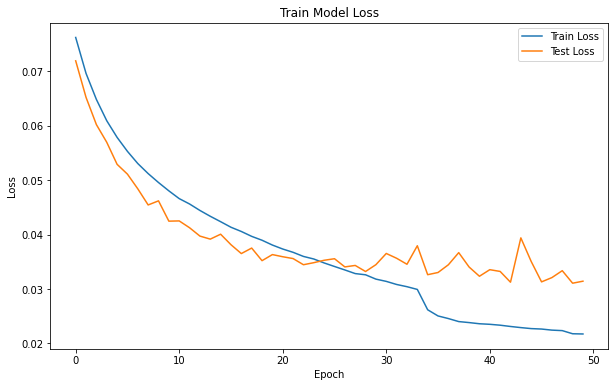

In [0]:
  cifar_model_train.plot_loss_graph()

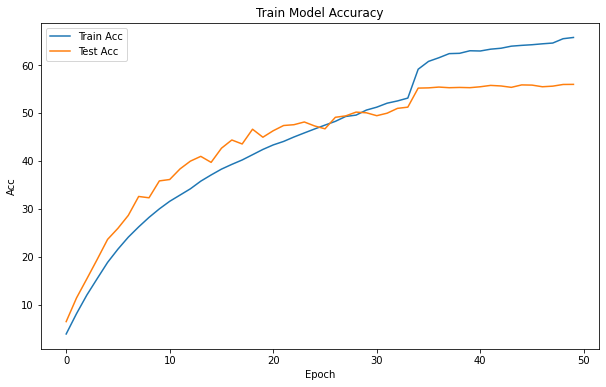

In [0]:
cifar_model_train.plot_acc_graph()

#GradCam

In [0]:
visualize_config_list = {
    'device':device,
    'mean': mean,
    'std': std,
    'resize_shape': (64,64),
    'model': cifar_model_train.model,
    'test_loader' : test_loader
}

In [0]:
from importlib import reload
from vision.train.utils.visualize import Visualization

In [0]:
# reload(vision.train.utils.visualize)

In [0]:
visual_obj = Visualization(visualize_config_list)
visual_obj.heatmap_activations_test_loader(5)
# visual_obj.heatmap_activations(6)
# visual_obj.heatmap_activations(7)

# Misclassified Images

In [0]:
misclassified  = cifar_model_train.misclassified_images_list[:25]
# misclassified


In [0]:
from vision.train.utils.visualize import UnNormalize

In [0]:
  normalized = UnNormalize(0.5,
                          0.5)

In [0]:

for i in range(25):
  img  = normalized(misclassified[i]["image"])
  visual_obj.heatmap_activations(img, class_names[misclassified[i]["actual_label"].item()], class_names[misclassified[i]["predicted_label"].item()])